# Machine Learning with Iris Dataset

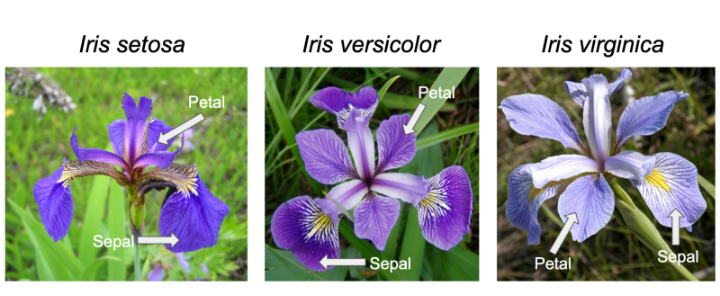

The Iris dataset is a classic dataset for classification, machine learning, and data visualization. The dataset contains: 3 classes (different Iris species) with 50 samples each, and then four numeric properties about those classes: Sepal Length, Sepal Width, Petal Length, and Petal Width.The aim of this project was to gain introductory exposure to Machine Learning Classification concepts along with Data Visualization. The project makes heavy usage of Scikit-Learn, Pandas and Data Visualization Libraries.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset

In [2]:
iris = load_iris()

# Create a DataFrame from the loaded data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map target integers to species names for better understanding
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows of the DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Explatory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
print('Correlation')
df.corr(numeric_only=True)

Correlation


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


# Feature Engineering

In [5]:
X = df.drop(columns=['species'], axis=1)
y = df['species']

# Convert categorical target to numerical values
y = y.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

# Graph Visualization

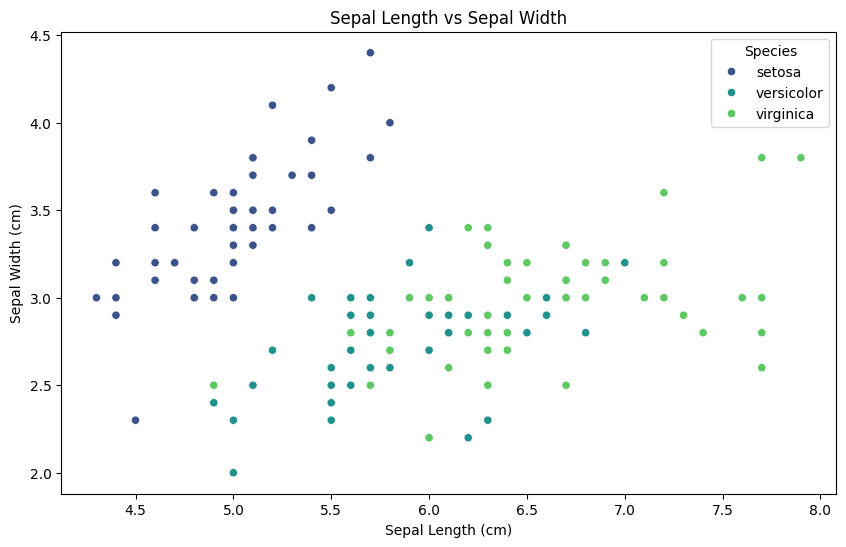

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df, palette='viridis')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

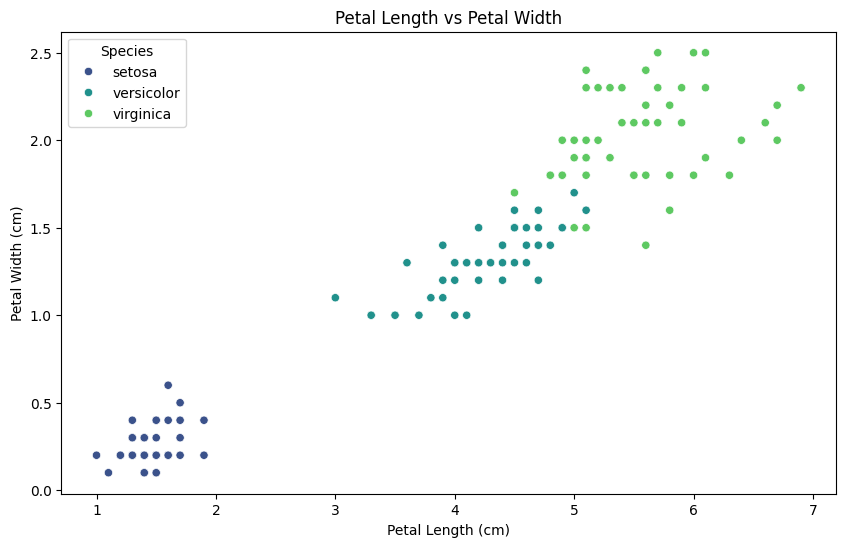

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=df, palette='viridis')
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

<Figure size 1000x600 with 0 Axes>

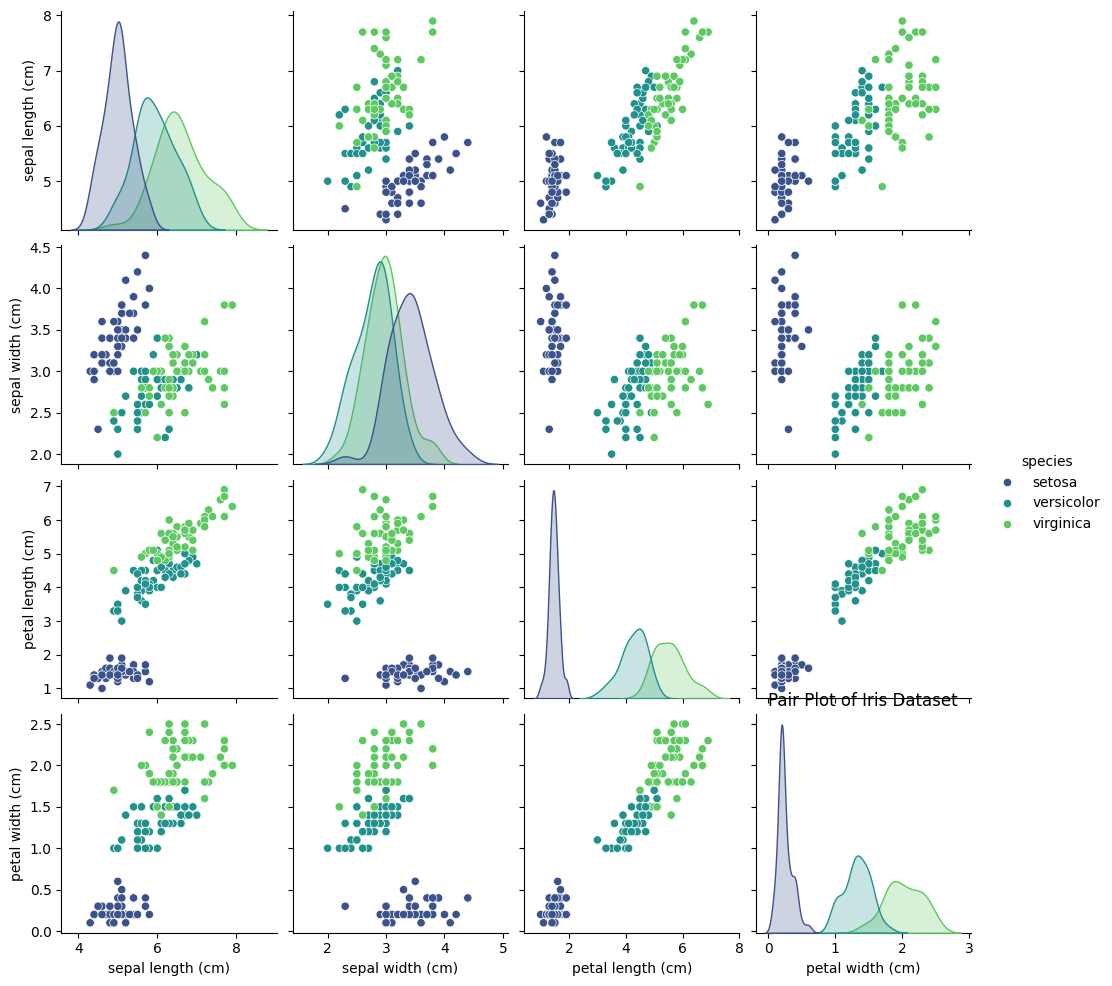

In [8]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='species', palette='viridis')
plt.title('Pair Plot of Iris Dataset')
plt.show()

<ipython-input-9-9735b7233461>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species',y='petal length (cm)', data=df, palette='viridis')
<ipython-input-9-9735b7233461>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species',y='petal width (cm)',data=df, palette='viridis')
<ipython-input-9-9735b7233461>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species',y='sepal length (cm)',data=df, palette='viridis')
<ipython-input-9-9735b7233461>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

<Axes: xlabel='species', ylabel='sepal width (cm)'>

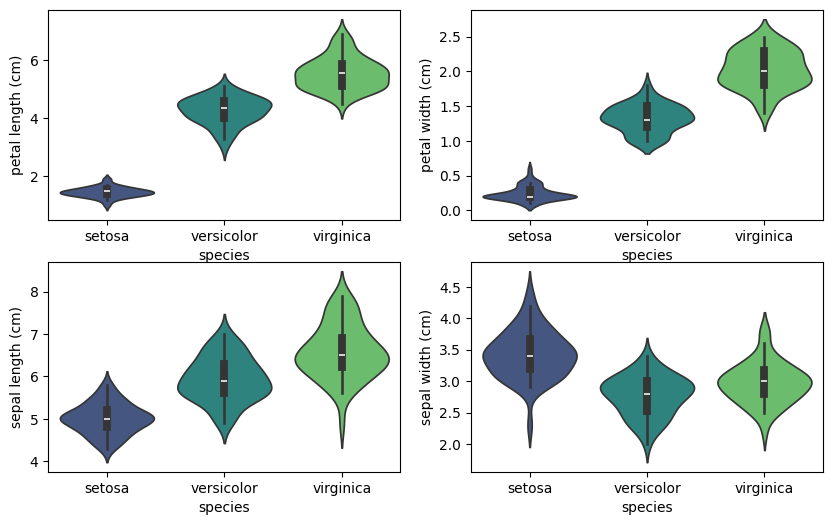

In [9]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal length (cm)', data=df, palette='viridis')
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal width (cm)',data=df, palette='viridis')
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal length (cm)',data=df, palette='viridis')
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal width (cm)',data=df, palette='viridis')

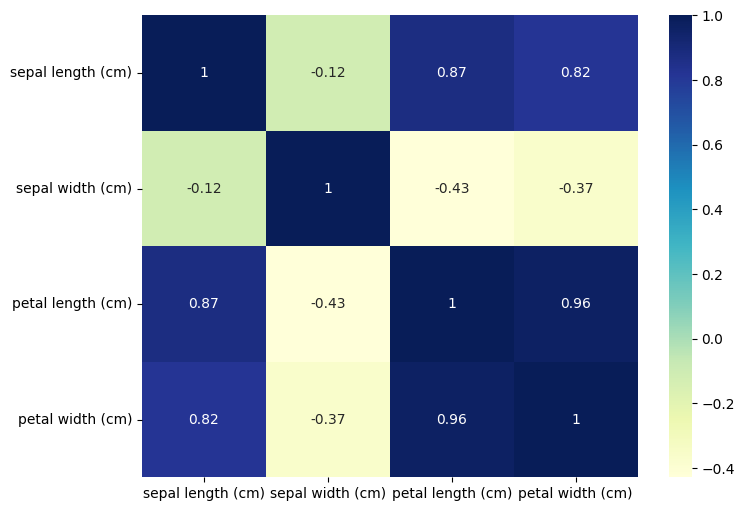

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [12]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.82      1.00      0.90        18
   virginica       1.00      0.73      0.85        15

    accuracy                           0.92        50
   macro avg       0.94      0.91      0.92        50
weighted avg       0.93      0.92      0.92        50



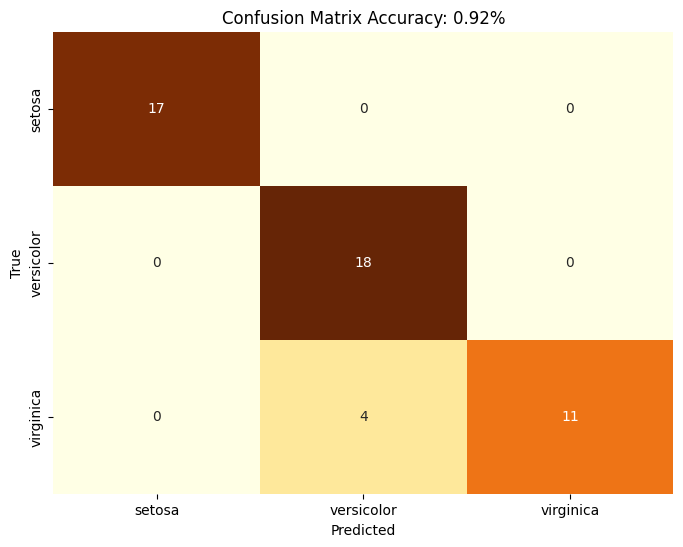

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', cbar=False, xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix Accuracy: {accuracy}%')
plt.show()